In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("input_data/creditcard_sampledata_3.csv", index_col=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

### Check imbalance data

In [5]:
df.Class.value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [6]:
from analysis.analyzer import TTTH_Analyzer

In [7]:
_analyzer = TTTH_Analyzer()

In [8]:
_analyzer.check_imbalance_class('Class',df)

Class count of Class:

0    0.990099
1    0.009901
Name: Class, dtype: float64
Ratio of 2 class is 100.0
You should consider to handle imbalance


### Build model

In [12]:
X = df.drop('Class', axis=1)
y = df[['Class']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Without resample

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

### Evaluation without resample

In [21]:
model.score(X_test, y_test)

0.9966953073364178

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[1499,    2],
       [   3,    9]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       0.82      0.75      0.78        12

    accuracy                           1.00      1513
   macro avg       0.91      0.87      0.89      1513
weighted avg       1.00      1.00      1.00      1513



### With resample method

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sampler = SMOTE()

In [54]:
X_resample, y_sample = sampler.fit_resample(X_train, y_train)

In [55]:
y_sample.Class.value_counts()

0    3492
1    3492
Name: Class, dtype: int64

In [60]:
model = LogisticRegression(solver='liblinear')

In [61]:
model.fit(X_resample,y_sample)

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [62]:
y_pred = model.predict(X_test)

### Evaluation without resample

In [63]:
model.score(X_test, y_test)

0.9973562458691342

In [64]:
confusion_matrix(y_test, y_pred)

array([[1498,    3],
       [   1,   11]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1501
           1       0.79      0.92      0.85        12

    accuracy                           1.00      1513
   macro avg       0.89      0.96      0.92      1513
weighted avg       1.00      1.00      1.00      1513



In [66]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:5]

array([[3.76819319e-05, 9.99962318e-01],
       [9.99903126e-01, 9.68743301e-05],
       [9.99761620e-01, 2.38380003e-04],
       [9.99997743e-01, 2.25711750e-06],
       [9.99583934e-01, 4.16066072e-04]])

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.9879524761270264

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

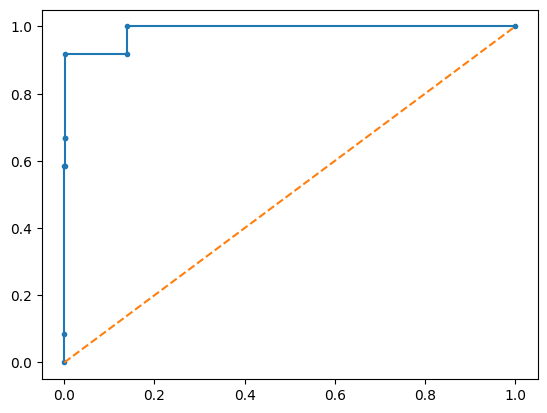

In [73]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1],[0,1], linestyle='--')
plt.show()